In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# load the dataset
data = pd.read_csv("D:\\Dhabe_Research\mc.csv")
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [ ]:
def min_max_normalization(data, minimum=0, maximum=1):
    for i in range(data.shape[1]):
        col = data[:, i]
        x_min = np.min(col)
        x_max = np.max(col)
        data[:, i] = minimum + ((col - x_min) * (maximum - minimum)) / (x_max - x_min)
    return data

from sklearn.preprocessing import minmax_scale

# apply min-max normalization
X_scaled = minmax_scale(X, feature_range=(0, 1))

# convert the numpy array back to a dataframe
#X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


In [ ]:
# Initialize the K-means model
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [ ]:
# Get the centroids
centroids = kmeans.cluster_centers_

# Get the labels for each data point
labels = kmeans.labels_

# Create an empty list to store the distances
distances = []

In [ ]:
print(centroids)

[[0.58638083 0.82783883]
 [0.08792846 0.79962894]
 [0.09265859 0.20319432]
 [0.6        0.16443149]
 [0.33029751 0.49508692]]


In [ ]:
# Calculate the distance between each data point and the centroid
for i in range(len(X_scaled)):
    distances.append(np.linalg.norm(X_scaled[i]-centroids[labels[i]]))

# Calculate the weights for each data point
weights = [1/dist for dist in distances]

# Fit the weighted K-means model
kmeans.fit(X_scaled, sample_weight=weights)

KMeans(n_clusters=5)

In [ ]:
# Get the new centroids
new_centroids = kmeans.cluster_centers_

# Get the new labels for each data point
new_labels = kmeans.labels_

In [ ]:
print(new_centroids)

[[0.09586562 0.19837545]
 [0.56705456 0.83191345]
 [0.58724869 0.15646996]
 [0.08409987 0.79183034]
 [0.33099687 0.49614575]]


In [ ]:
# Calculate the new distances
new_distances = []
for i in range(len(X_scaled)):
    new_distances.append(np.linalg.norm(X_scaled[i]-new_centroids[new_labels[i]]))
# Find the data point with the maximum distance
max_dist = max(new_distances)

# Set lambda value
lambda_val = 0.1


In [ ]:
# Identify the clusters within the radius of range of max distance - lambda value
clusters_in_range = []
for i in range(len(X_scaled)):
    if new_distances[i] <= max_dist - lambda_val:
        clusters_in_range.append(X_scaled[i])
        print(clusters_in_range)

[array([0.       , 0.3877551])]
[array([0.       , 0.3877551]), array([0.        , 0.81632653])]
[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041])]
[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ])]
[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918])]
[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918]), array([0.01639344, 0.76530612])]
[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918]), array([0.01639344, 0.76530612]), array([0.02459016, 0.05102041])]
[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672,

[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918]), array([0.01639344, 0.76530612]), array([0.02459016, 0.05102041]), array([0.02459016, 0.94897959]), array([0.03278689, 0.02040816]), array([0.03278689, 0.7244898 ]), array([0.03278689, 0.13265306]), array([0.03278689, 1.        ]), array([0.04098361, 0.14285714]), array([0.04098361, 0.7755102 ]), array([0.04098361, 0.12244898]), array([0.04098361, 0.79591837]), array([0.04918033, 0.34693878]), array([0.04918033, 0.66326531]), array([0.06557377, 0.28571429]), array([0.06557377, 0.98979592]), array([0.07377049, 0.34693878]), array([0.07377049, 0.73469388]), array([0.08196721, 0.04081633]), array([0.08196721, 0.73469388]), array([0.10655738, 0.13265306]), array([0.10655738, 0.82653061]), array([0.10655738, 0.31632653]), array([0.10655738, 0.6122449 ]), array([0.1147541 , 0.30612245]), array([0.1147541 , 0.87755102]), array([0.12

[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918]), array([0.01639344, 0.76530612]), array([0.02459016, 0.05102041]), array([0.02459016, 0.94897959]), array([0.03278689, 0.02040816]), array([0.03278689, 0.7244898 ]), array([0.03278689, 0.13265306]), array([0.03278689, 1.        ]), array([0.04098361, 0.14285714]), array([0.04098361, 0.7755102 ]), array([0.04098361, 0.12244898]), array([0.04098361, 0.79591837]), array([0.04918033, 0.34693878]), array([0.04918033, 0.66326531]), array([0.06557377, 0.28571429]), array([0.06557377, 0.98979592]), array([0.07377049, 0.34693878]), array([0.07377049, 0.73469388]), array([0.08196721, 0.04081633]), array([0.08196721, 0.73469388]), array([0.10655738, 0.13265306]), array([0.10655738, 0.82653061]), array([0.10655738, 0.31632653]), array([0.10655738, 0.6122449 ]), array([0.1147541 , 0.30612245]), array([0.1147541 , 0.87755102]), array([0.12

[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918]), array([0.01639344, 0.76530612]), array([0.02459016, 0.05102041]), array([0.02459016, 0.94897959]), array([0.03278689, 0.02040816]), array([0.03278689, 0.7244898 ]), array([0.03278689, 0.13265306]), array([0.03278689, 1.        ]), array([0.04098361, 0.14285714]), array([0.04098361, 0.7755102 ]), array([0.04098361, 0.12244898]), array([0.04098361, 0.79591837]), array([0.04918033, 0.34693878]), array([0.04918033, 0.66326531]), array([0.06557377, 0.28571429]), array([0.06557377, 0.98979592]), array([0.07377049, 0.34693878]), array([0.07377049, 0.73469388]), array([0.08196721, 0.04081633]), array([0.08196721, 0.73469388]), array([0.10655738, 0.13265306]), array([0.10655738, 0.82653061]), array([0.10655738, 0.31632653]), array([0.10655738, 0.6122449 ]), array([0.1147541 , 0.30612245]), array([0.1147541 , 0.87755102]), array([0.12

[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918]), array([0.01639344, 0.76530612]), array([0.02459016, 0.05102041]), array([0.02459016, 0.94897959]), array([0.03278689, 0.02040816]), array([0.03278689, 0.7244898 ]), array([0.03278689, 0.13265306]), array([0.03278689, 1.        ]), array([0.04098361, 0.14285714]), array([0.04098361, 0.7755102 ]), array([0.04098361, 0.12244898]), array([0.04098361, 0.79591837]), array([0.04918033, 0.34693878]), array([0.04918033, 0.66326531]), array([0.06557377, 0.28571429]), array([0.06557377, 0.98979592]), array([0.07377049, 0.34693878]), array([0.07377049, 0.73469388]), array([0.08196721, 0.04081633]), array([0.08196721, 0.73469388]), array([0.10655738, 0.13265306]), array([0.10655738, 0.82653061]), array([0.10655738, 0.31632653]), array([0.10655738, 0.6122449 ]), array([0.1147541 , 0.30612245]), array([0.1147541 , 0.87755102]), array([0.12

[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918]), array([0.01639344, 0.76530612]), array([0.02459016, 0.05102041]), array([0.02459016, 0.94897959]), array([0.03278689, 0.02040816]), array([0.03278689, 0.7244898 ]), array([0.03278689, 0.13265306]), array([0.03278689, 1.        ]), array([0.04098361, 0.14285714]), array([0.04098361, 0.7755102 ]), array([0.04098361, 0.12244898]), array([0.04098361, 0.79591837]), array([0.04918033, 0.34693878]), array([0.04918033, 0.66326531]), array([0.06557377, 0.28571429]), array([0.06557377, 0.98979592]), array([0.07377049, 0.34693878]), array([0.07377049, 0.73469388]), array([0.08196721, 0.04081633]), array([0.08196721, 0.73469388]), array([0.10655738, 0.13265306]), array([0.10655738, 0.82653061]), array([0.10655738, 0.31632653]), array([0.10655738, 0.6122449 ]), array([0.1147541 , 0.30612245]), array([0.1147541 , 0.87755102]), array([0.12

[array([0.       , 0.3877551]), array([0.        , 0.81632653]), array([0.00819672, 0.05102041]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.39795918]), array([0.01639344, 0.76530612]), array([0.02459016, 0.05102041]), array([0.02459016, 0.94897959]), array([0.03278689, 0.02040816]), array([0.03278689, 0.7244898 ]), array([0.03278689, 0.13265306]), array([0.03278689, 1.        ]), array([0.04098361, 0.14285714]), array([0.04098361, 0.7755102 ]), array([0.04098361, 0.12244898]), array([0.04098361, 0.79591837]), array([0.04918033, 0.34693878]), array([0.04918033, 0.66326531]), array([0.06557377, 0.28571429]), array([0.06557377, 0.98979592]), array([0.07377049, 0.34693878]), array([0.07377049, 0.73469388]), array([0.08196721, 0.04081633]), array([0.08196721, 0.73469388]), array([0.10655738, 0.13265306]), array([0.10655738, 0.82653061]), array([0.10655738, 0.31632653]), array([0.10655738, 0.6122449 ]), array([0.1147541 , 0.30612245]), array([0.1147541 , 0.87755102]), array([0.12

In [ ]:
# Fit the K-means model to the clusters within the range
final_kmeans = KMeans(n_clusters=5)
final_kmeans.fit(clusters_in_range)

# Get the final labels
final_labels = final_kmeans.labels_
final_labels = final_kmeans.labels_.tolist()

print(final_labels)


[3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]


In [ ]:
final_labels = final_kmeans.labels_
X_scaled = X_scaled[np.where(final_labels != -1)[0]]
final_labels = final_labels[np.where(final_labels != -1)[0]]


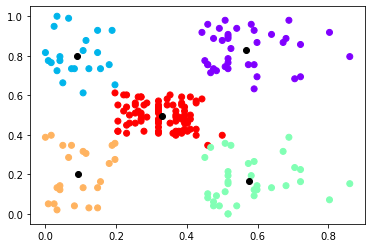

In [ ]:
# Plot the clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=final_labels, cmap='rainbow')
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], color='black')
plt.show()

In [ ]:
accuracy = sum([1 for i in range(len(X_scaled)) if labels[i] == final_labels[i]]) / len(X_scaled)
print(accuracy)

0.7091836734693877


In [ ]:
# # Calculate the accuracy
# accuracy = len(np.where(labels == final_labels)) / len(X)
# print(accuracy)

In [ ]:

from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, final_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5695922610840338
